<a href="https://colab.research.google.com/github/NitiSivakumarAnavai/NitiSivakumarAnavai/blob/main/DataAnalyticsMod5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/insurance - insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#linear regression is a statistical method used to model the relationship b/w dependent variable and one or more independently variables. The goal is to establish linear relationship between the variables.find dependent variable based on independent variable
#Estimate how much a new patient might incur in medical expenses based on their profile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data['smoker'].value_counts()
grouped_data=data.groupby(['smoker','sex'])['charges'].mean().reset_index()
grouped_data

,smoker,sex,charges
0,no,female,8762.297300
1,no,male,8087.204731
2,yes,female,30678.996276
3,yes,male,33042.005975


In [6]:
#reset index turn group label into regular column
grouped_data=data.groupby(['smoker','sex'])['charges'].agg(['mean','sum','count']).reset_index()
grouped_data

,smoker,sex,mean,sum,count
0,no,female,8762.297300,4.792977e+06,547
1,no,male,8087.204731,4.181085e+06,517
2,yes,female,30678.996276,3.528085e+06,115
3,yes,male,33042.005975,5.253679e+06,159


In [7]:
#split data into dependent and independent
#feature and target seperation
#note:[[ to put multiple value]]
X=data[['age','bmi','smoker','children','region']]
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
#catregorical to dummy
X=pd.get_dummies(X,drop_first=True).astype(int)
X
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

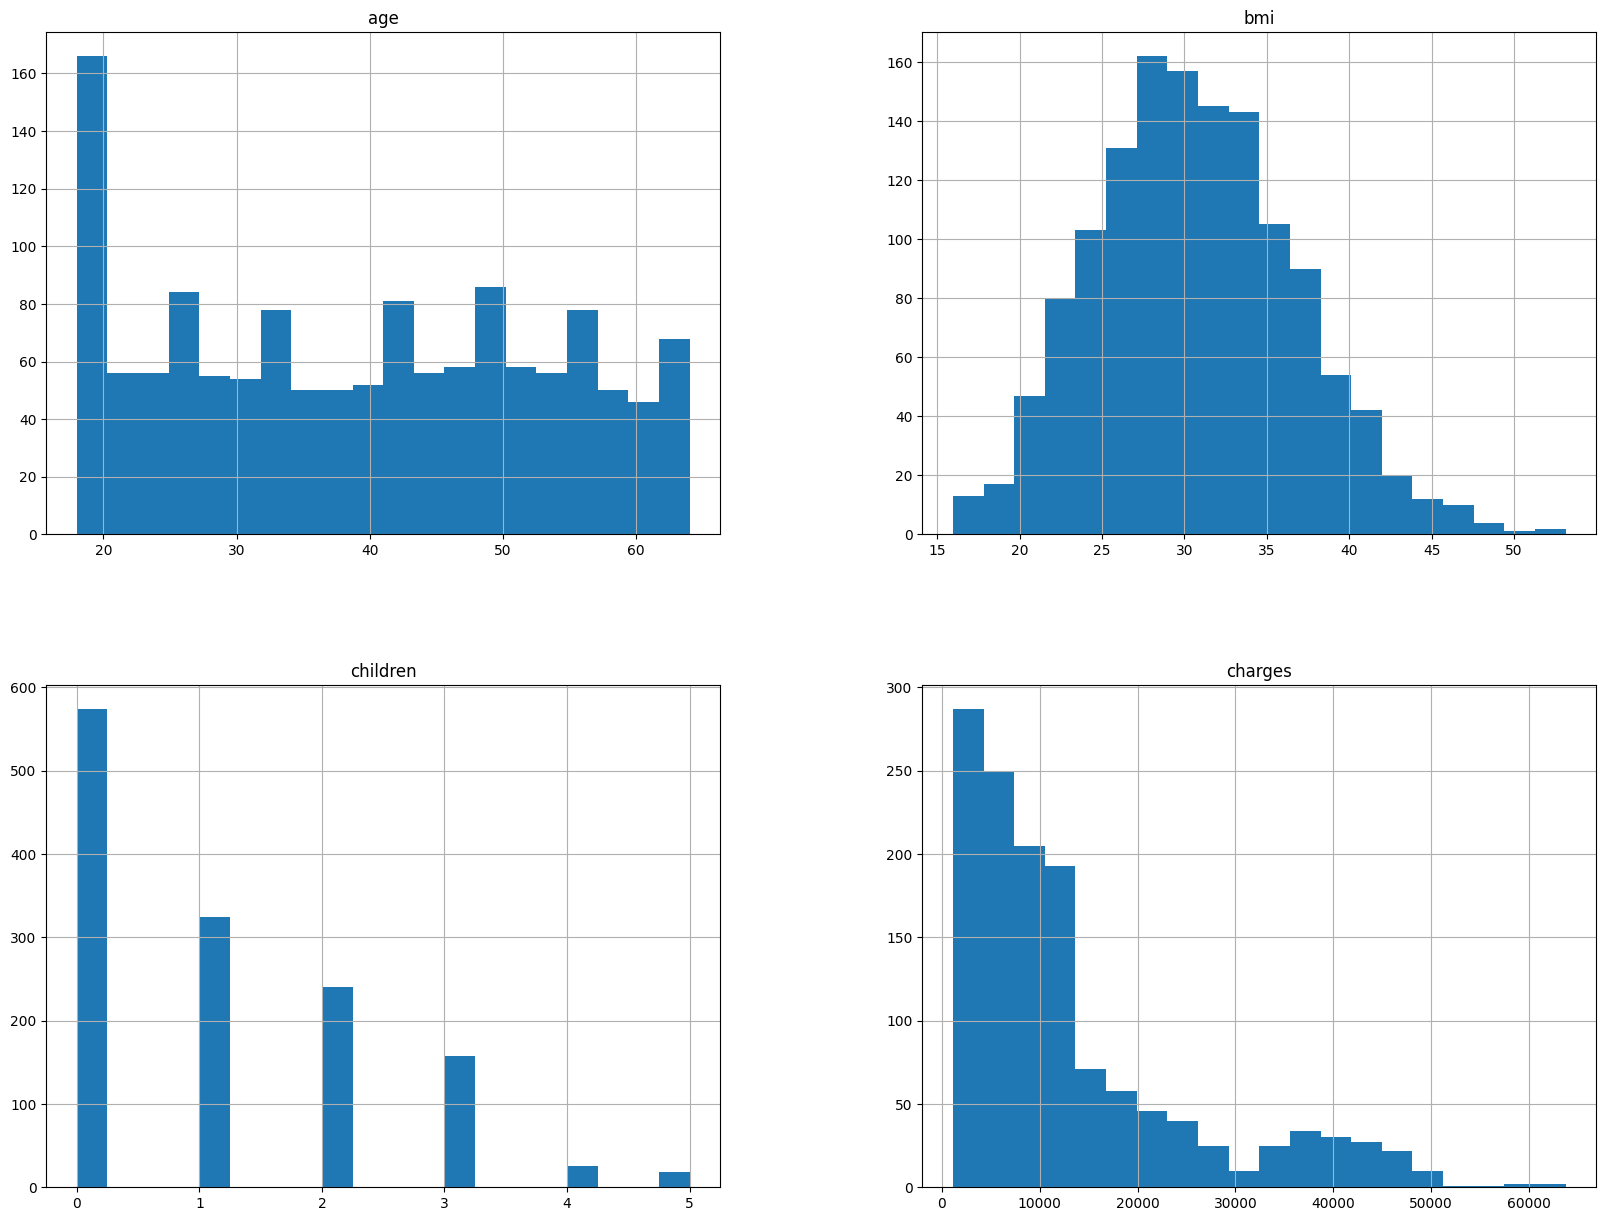

In [9]:
#plotting histogram
data.hist(bins=20,figsize=(20,15)) #all numerical data
#data['age'].hist(bins=20,figsize=(20,15)) #specific variable
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

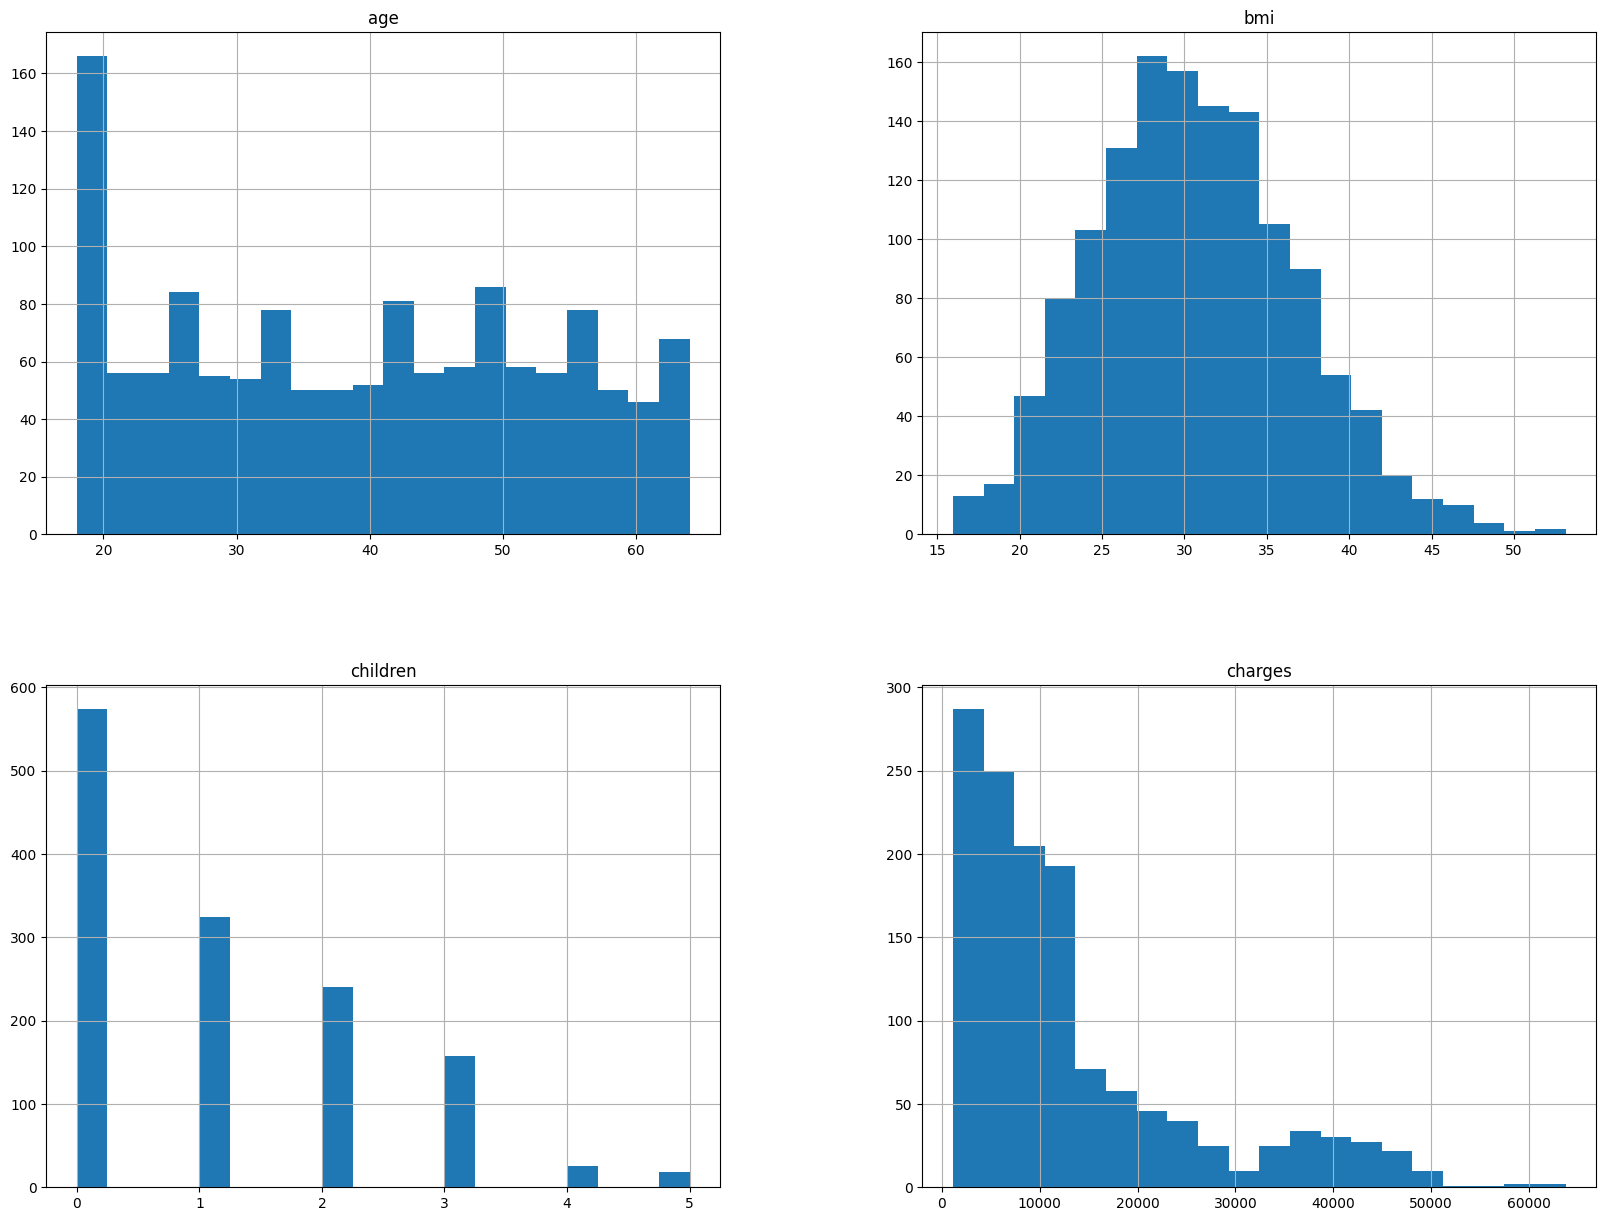

In [10]:
#plotting histogram
data.hist(bins=20,figsize=(20,15)) #all numerical data
#data['age'].hist(bins=20,figsize=(20,15)) #specific variable
plt.show

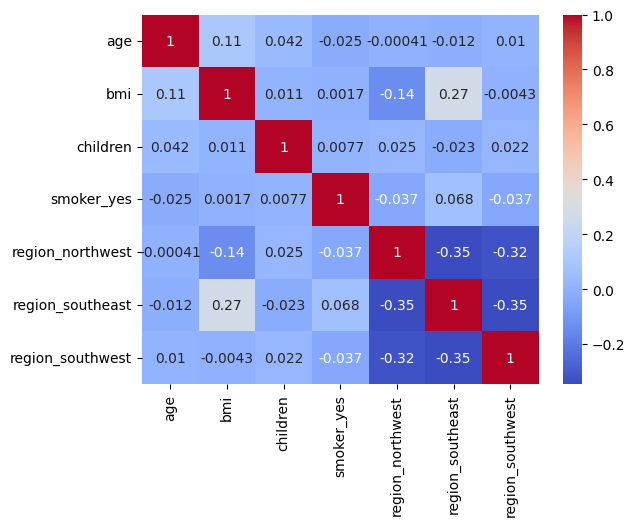

In [11]:
#correlation matrix
correlation=X.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

In [13]:
#split data into trainijjng and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #same set of random values
X_train

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19,2,0,1,0,0
1285,47,24,0,0,0,0,0
1142,52,24,0,0,0,1,0
969,39,34,5,0,0,1,0
486,54,21,3,0,1,0,0
...,...,...,...,...,...,...,...
1095,18,31,4,0,0,0,0
1130,39,23,5,0,0,1,0
1294,58,25,0,0,0,0,0
860,37,47,2,1,0,0,1


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# create lr model
model=LinearRegression()

In [15]:
#training model
model.fit(X_train,y_train)
#predictions
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
mse_train = mean_squared_error (y_train, y_pred_train)

mse_test = mean_squared_error (y_test, y_pred_test)

In [16]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train MSE: (mse_train), Train R2: (r2_train)")
print(f"Test MSE: (mse_test), Test R2: (r2_test)")

Train MSE: (mse_train), Train R2: (r2_train)
Test MSE: (mse_test), Test R2: (r2_test)


In [21]:
#in regression --> the coeffiecients represent the importance of our linear regression model
coeff = model.coef_
features = X.columns
#create dataframe to display the feature importance
importance_df = pd.DataFrame({'Feature' : features, 'Coefficeint': coeff})
#sort the Dtaframe by importance
importance_df = importance_df.sort_values(by='Coefficeint', ascending = False)
importance_df

,Feature,Coefficeint
3,smoker_yes,23654.173016
2,children,427.464663
1,bmi,335.599397
0,age,257.100813
4,region_northwest,-364.379455
5,region_southeast,-667.234554
6,region_southwest,-819.308013


<function matplotlib.pyplot.show(close=None, block=None)>

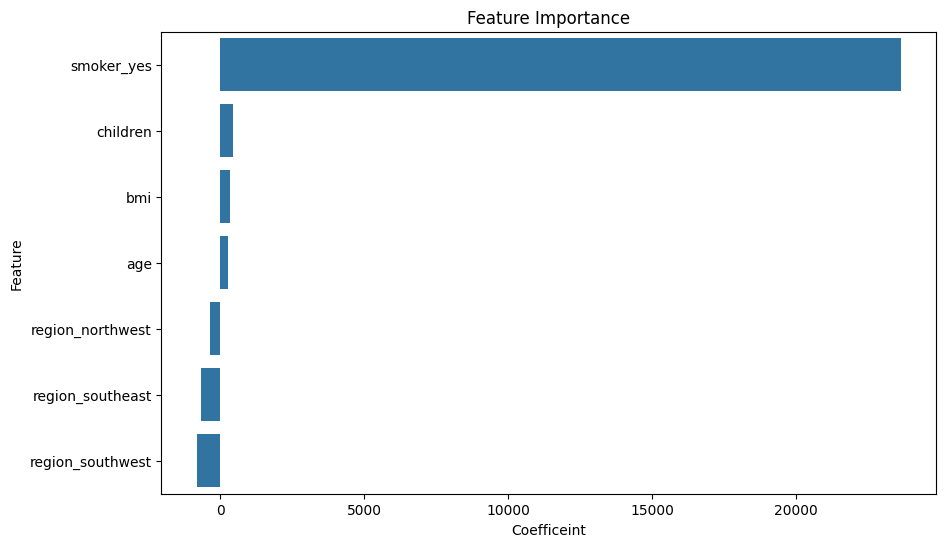

In [23]:
#plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficeint', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show